In [1]:
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import numpy as np
import cython

# REAL Sinusoids

In [2]:
#real sinosoid

A = 0.8 #amplitude
freq = 1000 # in Hertz
phi = np.pi/2
fs = 44100  # Sampling rate
t= np.arange(-0.002,0.002, 1/fs)

In [4]:
x = A*np.cos(2*np.pi*freq*t+phi)

In [7]:
x

array([-3.42901104e-16, -1.13595454e-01, -2.24888891e-01, -3.31624941e-01,
       -4.31640595e-01, -5.22909028e-01, -6.03580681e-01, -6.72020739e-01,
       -7.26842259e-01, -7.66934282e-01, -7.91484340e-01, -7.99994925e-01,
       -7.92293569e-01, -7.68536341e-01, -7.29204682e-01, -6.75095650e-01,
       -6.07305768e-01, -5.27208802e-01, -4.36427921e-01, -3.36802804e-01,
       -2.30352360e-01, -1.19233813e-01, -5.69898609e-03,  1.07951331e-01,
        2.19414009e-01,  3.26430249e-01,  4.26831363e-01,  5.18582716e-01,
        5.99824962e-01,  6.68911723e-01,  7.24442951e-01,  7.65293303e-01,
        7.90634945e-01,  7.99954327e-01,  7.93062590e-01,  7.70099398e-01,
        7.31530098e-01,  6.78136302e-01,  6.11000037e-01,  5.31481822e-01,
        4.41193099e-01,  3.41963575e-01,  2.35804140e-01,  1.24866121e-01,
        1.13976830e-02, -1.02301729e-01, -2.13927992e-01, -3.21218991e-01,
       -4.22000471e-01, -5.14230088e-01, -5.96038804e-01, -6.65768761e-01,
       -7.22006879e-01, -

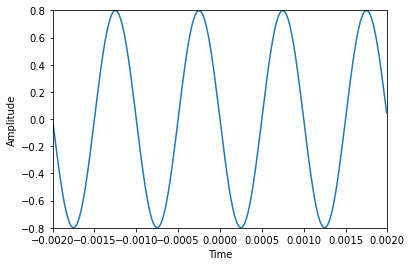

In [8]:
plt.plot(t,x)
plt.axis([-0.002,0.002,-0.8,0.8])
plt.xlabel ("Time")
plt.ylabel("Amplitude")
plt.show()

# B) Complex Sinusoids

In [9]:
N = 500 
k=3 # no of period
n= np.arange(-N/2,N/2)

In [11]:
s = np.exp(1j*2*np.pi/N * k*n) # w= 2pi/N

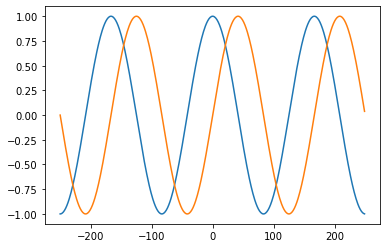

In [17]:
plt.plot(n,np.real(s))  # REAL Part
plt.plot(n,np.imag(s)) # Imaginary Part
#plt.axis(-N/2,N/2,-1,1)

# C) DFT implementation (complex wave signal)

In [43]:
#initialize
# define a signal (complex wave)
N= 64
k0= 7
x= np.exp(1j*2*np.pi*k0/N * np.arange(N))

# define an Empty array for appending DFT calculations
X = np.array([])

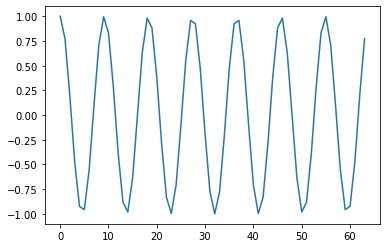

In [44]:
plt.plot(np.real(x))

In [45]:
#iterate over the entire 0 to N-1 range
for k in range(N-1):
    # create a complex sinusoid for each frequency
    s = np.exp(1j*2*np.pi* k/N *np.arange(N))
    X = np.append(X,sum(x*np.conjugate(s)))


In [46]:
abs(X)

array([2.95619683e-15, 1.22628141e-15, 6.57285786e-15, 2.72174520e-15,
       5.78302588e-15, 4.68008719e-15, 7.79551301e-15, 6.40000000e+01,
       1.54178163e-14, 6.62608782e-15, 2.22477863e-14, 2.46841805e-14,
       8.03206268e-15, 1.34378269e-14, 3.02013315e-15, 4.14590636e-14,
       1.71722470e-14, 2.14413932e-14, 3.94254640e-14, 7.87660790e-14,
       1.35925263e-14, 2.31263080e-14, 1.18206171e-14, 3.91608648e-14,
       5.25789071e-14, 2.79066544e-14, 1.49303327e-14, 1.16023618e-14,
       7.63286404e-14, 5.61563273e-14, 1.34428709e-14, 1.57655579e-14,
       7.08967596e-14, 1.45418027e-14, 3.03402340e-14, 6.42516097e-15,
       4.11159297e-14, 4.00204217e-14, 1.47809842e-14, 4.90324730e-14,
       1.30874117e-13, 5.11805890e-14, 4.75576055e-14, 3.59811618e-14,
       2.21534009e-14, 4.72514363e-14, 1.18547076e-13, 1.31048649e-14,
       3.36426888e-14, 3.15619828e-14, 1.14867381e-13, 2.53481204e-14,
       3.53705364e-14, 6.65137801e-14, 9.22788366e-14, 2.00902058e-14,
      

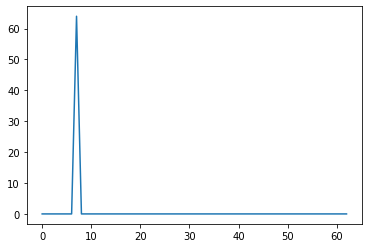

In [47]:
plt.plot(np.arange(N-1),abs(X)) # 64 value at freq 7 clearly suggests that our sine wave is of freq7

# DFT real sinewave

In [52]:
#initialize
# define a signal (complex wave)
N= 64
k0= 7
x= np.cos(2*np.pi*k0/N * np.arange(N))

# define an Empty array for appending DFT calculations
X = np.array([])

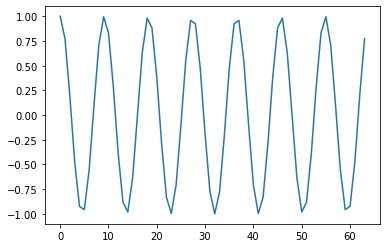

In [53]:
plt.plot(x)

In [54]:
nv = np.arange(-N/2,N/2)
kv = np.arange(-N/2,N/2)

#iterate over the entire 0 to N-1 range
for k in kv:
    # create a complex sinusoid for each frequency
    s = np.exp(1j*2*np.pi* k/N *nv)
    X = np.append(X,sum(x*np.conjugate(s)))

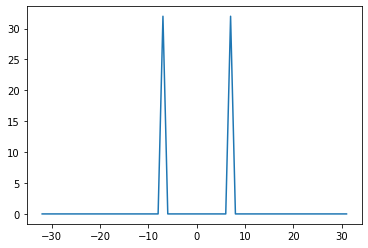

In [55]:
plt.plot(kv,abs(X)) # A real wave has two complex signal at both -7 and -7

# Inverse DFT

In [56]:
#initialize empty array
y= np.array([]) #output signal

In [57]:
#iterate over the time component
for n in nv: 
    s = np.exp(1j*2*np.pi* n/N *kv)  # kv frequencies, So 's' is sum of all the complex exponentials of all possible frequencies at a given sample
    y = np.append(y,1/N*sum(X*s))  #

C:\Users\jayka\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


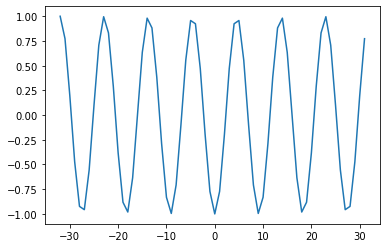

In [59]:
plt.plot(kv,y)